In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

SAT Admitted
0    1363       No
1    1792      Yes
2    1954      Yes
3    1653       No
4    1593       No
..    ...      ...
163  1722      Yes
164  1750      Yes
165  1555       No
166  1524       No
167  1461       No

[168 rows x 2 columns]

In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({
    'Yes': 1,
    'No': 0
})
data

SAT  Admitted
0    1363         0
1    1792         1
2    1954         1
3    1653         0
4    1593         0
..    ...       ...
163  1722         1
164  1750         1
165  1555         0
166  1524         0
167  1461         0

[168 rows x 2 columns]

In [4]:
y = data['Admitted']
x1 = data['SAT']

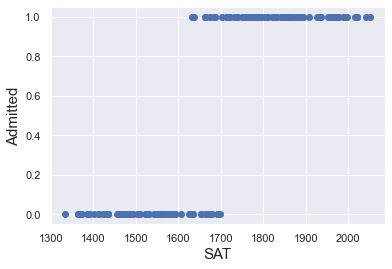

In [5]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=15)
plt.ylabel('Admitted', fontsize=15)
plt.show()

In [7]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
result_lin = reg_lin.fit()

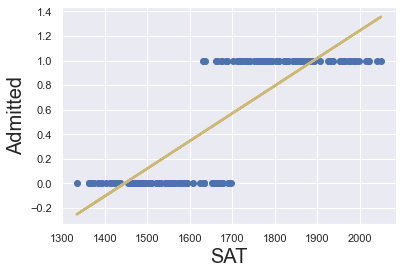

In [10]:
plt.scatter(x1, y)

y_hat = result_lin.params[1]*x1 + result_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


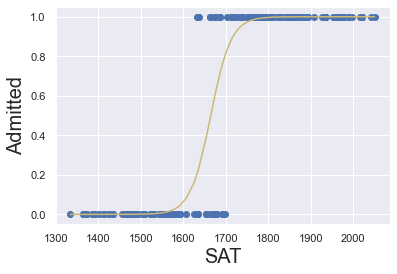

In [12]:
reg_log = sm.Logit(y, x)
res_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,res_log.params[0],res_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()